In [1]:
import os
os.chdir('/Users/mcha5804/Library/CloudStorage/OneDrive-TheUniversityofSydney(Students)/PyCharm/toliman-phd')

import jax.numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['image.cmap'] = 'inferno'
plt.rcParams["font.family"] = "monospace"
plt.rcParams["image.origin"] = 'lower'
plt.rcParams['figure.dpi'] = 120
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'

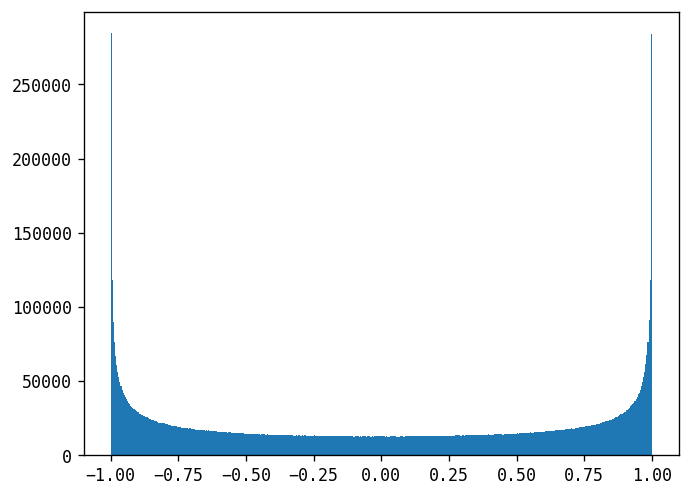

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# define the sinusoid function
def sinusoid(x, A, f, phi):
    return A * np.sin(2 * np.pi * f * x + phi)

# define the parameters
A = 1
f = 0.5
phi = 0

# sample from the data uniformly
samples = np.random.uniform(-1, 1, int(1e7))

# plot the histogram
plt.hist(sinusoid(samples, A, f, phi), bins=500)
plt.show()


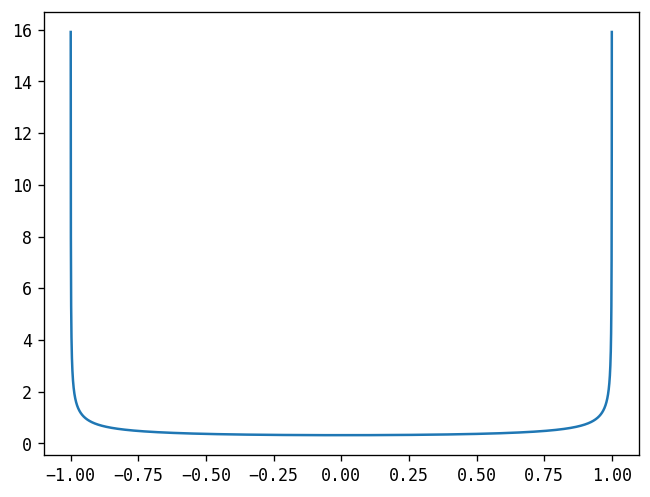

In [3]:
import jax.numpy as jnp
from jax import grad, vmap

# define the function to calculate the derivative of arcsin(x)
def derivative_arcsin(x):
    return vmap(grad(jnp.arcsin))(x) / np.pi


xs = np.linspace(-1, 1, 10000)

# plt.plot(xs, jnp.arcsin(xs) / np.pi + 1/2)
plt.plot(xs, derivative_arcsin(xs))

/var/folders/7d/c7wd3zcx3dlc6fmsmqwykh0m0000gn/T/ipykernel_36945/10735514.py:5: RuntimeWarning: divide by zero encountered in power
  return (A**2 - x**2)**(-0.5) / np.pi


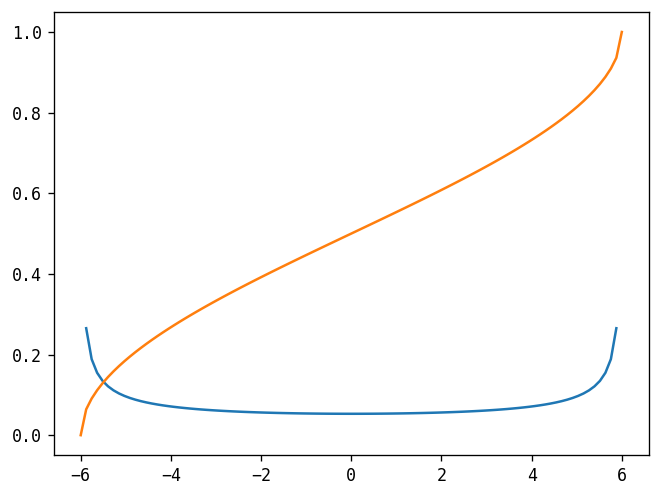

In [4]:
def CDF(x, A):
    return np.arcsin(x/A) / np.pi + 1/2

def PDF(x, A):
    return (A**2 - x**2)**(-0.5) / np.pi

A = 6
xs = np.linspace(-A, A, 100)
plt.plot(xs, PDF(xs, A))
plt.plot(xs, CDF(xs, A))
plt.show()

In [5]:
A = 2
npix = 10

# Evaluate
edges = np.linspace(-A, A, npix+1)
pixel_width = edges[1] - edges[0]
centres = np.arange(-A + pixel_width/2, A, pixel_width)
xss = np.linspace(-A, A, 10000)

pixel_counts = CDF(edges[1:], A) - CDF(edges[:-1], A)


/var/folders/7d/c7wd3zcx3dlc6fmsmqwykh0m0000gn/T/ipykernel_36945/10735514.py:5: RuntimeWarning: divide by zero encountered in power
  return (A**2 - x**2)**(-0.5) / np.pi


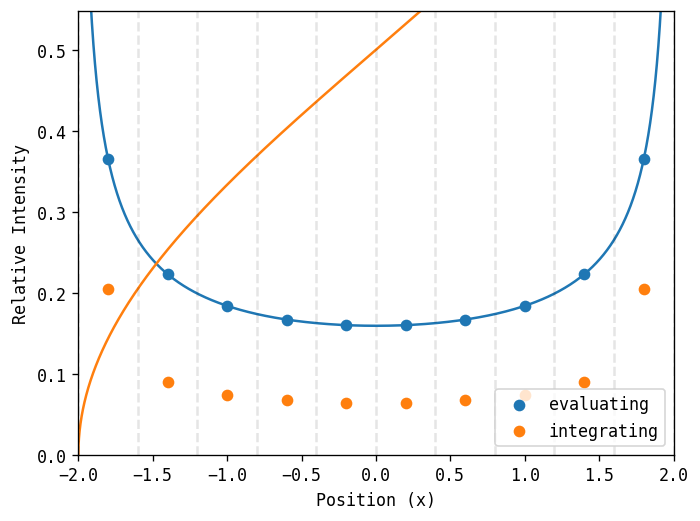

In [6]:
plt.scatter(centres, PDF(centres, A), label="evaluating")
plt.plot(xss, PDF(xss, A))

plt.plot(xss, CDF(xss, A))
plt.scatter(centres, pixel_counts, label="integrating")

for edge in edges:
    plt.axvline(edge, c='k', linestyle='--', alpha=0.1)
plt.xlim(-A, A)
plt.ylim(0, 1.5*PDF(centres, A).max())
plt.xlabel('Position (x)')
plt.ylabel('Relative Intensity')
plt.legend()
plt.show()

In [7]:
from dLux.utils import nd_coords
diameter = 4.2
pscale = 0.375
npixels = np.ceil(diameter / pscale)
centres = nd_coords(npixels=(npixels, npixels), pixel_scales=pscale)

edges = nd_coords(npixels=(npixels+1, npixels+1), pixel_scales=pscale)

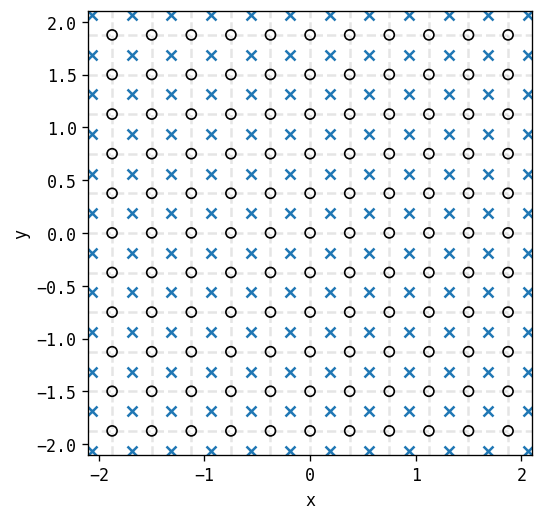

In [8]:
fig, ax = plt.subplots()
ax.scatter(centres[0], centres[1], marker='x')
ax.scatter(edges[0], edges[1], marker='o', facecolors='none', edgecolors='k')
ax.set(
    xlim=(-diameter/2, diameter/2),
    ylim=(-diameter/2, diameter/2),
    xlabel='x',
    ylabel='y',
)

for edge in edges[0][0]:
    ax.axvline(edge, c='k', linestyle='--', alpha=0.1)
    ax.axhline(edge, c='k', linestyle='--', alpha=0.1)
ax.set_aspect('equal')
plt.show()

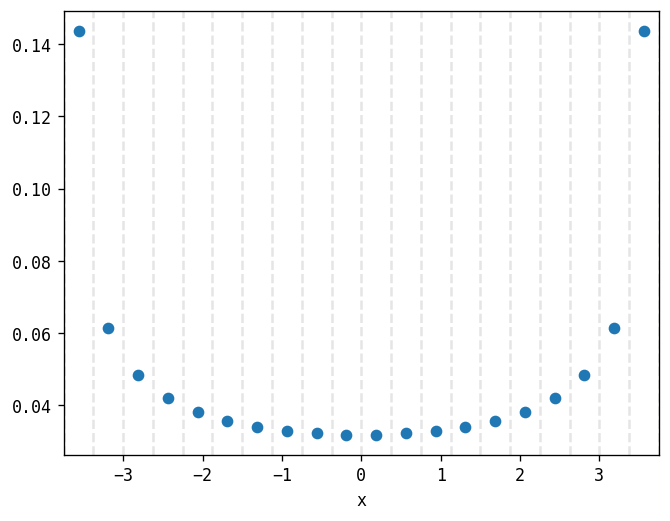

In [14]:
A = pscale*10  # arcsecs
pscale = 0.375  # arcsec / pixel

npix = int(np.ceil(2*A / pscale))
centres = nd_coords(npixels=(npix, npix), pixel_scales=pscale)
edges = nd_coords(npixels=(npix+1, npix+1), pixel_scales=pscale)
pixel_vals = CDF(edges[0][0][1:], A) - CDF(edges[0][0][:-1], A)

fig, ax = plt.subplots()
ax.scatter(centres[0][0], pixel_vals, linestyle='-')
ax.set(
    xlim=(-A, A),
    xlabel='x',
)
for edge in edges[0][0]:
    ax.axvline(edge, c='k', linestyle='--', alpha=0.1)
plt.show()

In [13]:
CDF(edges[0][0][1:], A)

/var/folders/7d/c7wd3zcx3dlc6fmsmqwykh0m0000gn/T/ipykernel_36945/10735514.py:2: RuntimeWarning: invalid value encountered in arcsin
  return np.arcsin(x/A) / np.pi + 1/2


array([0.12328672, 0.1864295 , 0.23447472, 0.27554375, 0.31250563,
       0.3467863 , 0.3792308 , 0.41040212, 0.4407115 , 0.47048458,
       0.5       , 0.5295154 , 0.5592885 , 0.5895979 , 0.6207692 ,
       0.65321374, 0.6874944 , 0.72445625, 0.7655253 , 0.8135705 ,
       0.8767133 ,        nan], dtype=float32)